# Stroke Prediction Models 

## By: Jacob Crawford, Jaimi Patel, and Seif Abuhashish

## **Overview** 

#### Stroke is the second driving reason for death internationally, accounting for around 11% of absolute pass outs. This dataset is utilized to foresee whether a patient is going to get a stroke considering the information boundaries like gender, age, various diseases, and smoking status. Each line in the information gives relevant data about the patient. The idea is to analyze the stroke data and predict the possibility of having a stroke. Our data set contains 12 attributes and 5110 data points. We plan to preprocess, organize, and clean the set to derive knowledge from our set with descriptive statistics and visualizations. After gaining a better understanding of our data we build multiple classification models that predict our dependent variable. The models are compared, and the best fitting model is chosen for analysis and interpretation.

#### The Stroke dataset contains 12 attributes and 5110 observations. Stroke is the binary dependent variable. The rest of the data set is composed of 11 independent variables, five of those are categorical (gender, ever_married, work_type, Residence_type, smoking_status), three are continuous variables (age, BMI, avg_glucose_level), and two are binary variables (hypertension, heart_disease).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

**Loading** **Dataset** 
Load the stroke dataset here with your local filepath. Remove the google co-lab upload code.

In [3]:
Stroke_pd = pd.read_csv("/Users/cdmstudent/Desktop/StrokeProject/FinalProjectStrokes/healthcare-dataset-stroke-data.csv")
#Stroke_pd = pd.read_csv("/Users/seifabuhashish/Desktop/Depaul MSDS/DSC 478 Machine Learning Algorithm Q6/Group Project/healthcare-dataset-stroke-data.csv")Stroke_pd = pd.read_csv("/Users/seifabuhashish/Desktop/Depaul MSDS/DSC 478 Machine Learning Algorithm Q6/Group Project/healthcare-dataset-stroke-data.csv")
Stroke_pd.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
Stroke_pd = pd.read_csv(io.StringIO(uploaded['healthcare-dataset-stroke-data.csv'].decode('utf-8')))
#!wget -O 'healthcare-dataset-stroke-data.csv' https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/download
Stroke_pd = pd.read_csv('healthcare-dataset-stroke-data.csv')
Stroke_pd.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
Stroke_pd_row_count, Stroke_pd_column_count=Stroke_pd.shape
print('Total number of rows:', Stroke_pd_row_count)
print('Total number of columns:', Stroke_pd_column_count)

Total number of rows: 5110
Total number of columns: 12


**Data** **Preprocessing**

In [5]:
Stroke_pd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
Stroke_pd.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Categorical variables: gender, ever_married, work_type, Residence_type, smoking_status, hypertension, heart_disease, stroke

### Numerical variables: id, age, avg_glucose_level, bmi

In [7]:
#finding out total missing values in dataset
print(Stroke_pd.isnull().sum().sum())

201


In [8]:
#attributes with total missing values
Stroke_pd.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#counting outliers for bmi

bmi_outliers=Stroke_pd[Stroke_pd['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [10]:
#replacing outlier entries with mean of bmi
Stroke_pd["bmi"] = Stroke_pd["bmi"].apply(lambda x: Stroke_pd.bmi.mean() if x>50 else x)

In [11]:
# Replacing null values of bmi with mean of bmi column

Stroke_pd.bmi.replace(to_replace=np.nan,value=Stroke_pd.bmi.mean(), inplace=True)
print (Stroke_pd.shape)

(5110, 12)


In [12]:
#again check if there is any Nan value left after removing msising values 
Stroke_pd.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
#chehcking for unique values
Stroke_pd.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   364
smoking_status          4
stroke                  2
dtype: int64

Text(0.5, 0, 'Variables')

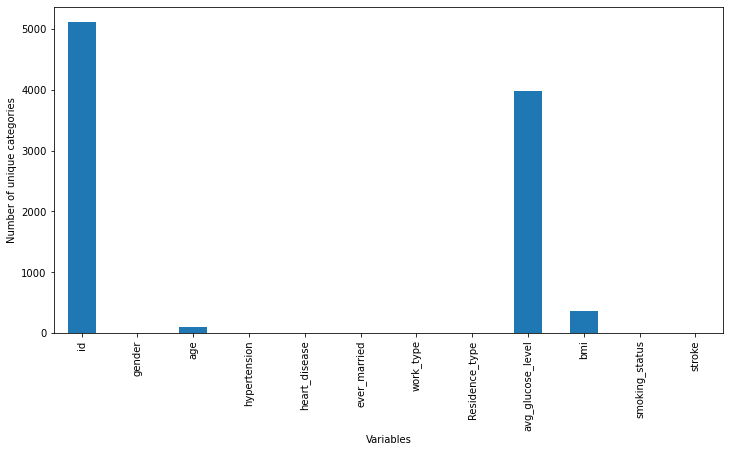

In [14]:
#plot with the cardinality of each variable
Stroke_pd.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')

In [15]:
# Dropping not necessary Id column
Stroke_pd.drop(columns='id', inplace=True)
Stroke_pd.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.451796,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.451796,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [16]:
Stroke_pd.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
# number of 'other' is very small, converting the value to 'Male'
Stroke_pd['gender']=Stroke_pd['gender'].replace('Other','Male')

In [18]:
Stroke_pd.gender.value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [19]:
#converting categorical variable to numerical
Stroke_pd.replace({ 'gender': {'Male':1 ,'Female':0}} ,inplace=True)
Stroke_pd.replace({ 'ever_married': {'No':0 ,'Yes':1}} ,inplace=True)
Stroke_pd.replace({ 'Residence_type': {'Rural':0 ,'Urban':1}} ,inplace=True)
Stroke_pd.replace({ 'smoking_status': {'Unknown':0 ,'never smoked':1,'formerly smoked':2,'smokes':3}} ,inplace=True)
Stroke_pd.replace({ 'work_type': {'Private':0 ,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}} ,inplace=True)


In [20]:
Stroke_pd.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.600000,2,1
1,0,61.0,0,0,1,1,0,202.21,28.451796,1,1
2,1,80.0,0,1,1,0,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,0,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,1,0,174.12,24.000000,1,1
5,1,81.0,0,0,1,0,1,186.21,29.000000,2,1
6,1,74.0,1,1,1,0,0,70.09,27.400000,1,1
7,0,69.0,0,0,0,0,1,94.39,22.800000,1,1
8,0,59.0,0,0,1,0,0,76.15,28.451796,0,1
9,0,78.0,0,0,1,0,1,58.57,24.200000,0,1


In [21]:
Stroke_pd.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414090,43.226614,0.097456,0.054012,0.656164,0.832094,0.508023,106.147677,28.451796,1.179843,0.048728
std,0.492612,22.612647,0.296607,0.226063,0.475034,1.109924,0.499985,45.283560,6.816963,1.029961,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,91.885000,28.400000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.400000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,49.900000,3.000000,1.000000


In [22]:
Stroke_pd.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

**Target** **Varaible** **Stroke** 

#### No Stroke = 0     Stroke = 1

#### 95.1% of dataset have no stroke incidence vs 4.9% that do. 

<AxesSubplot:xlabel='stroke', ylabel='Count'>

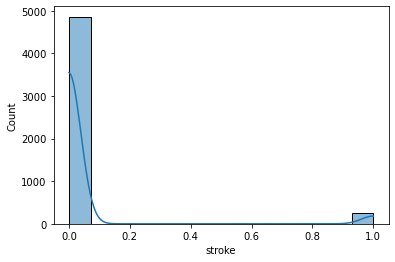

In [23]:
sns.histplot(data=Stroke_pd, x="stroke", kde=True)

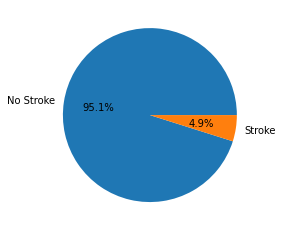

In [24]:
labels = ["No Stroke", "Stroke"]
values = Stroke_pd['stroke'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

## Histogram for numerical variables age, bmi, and avg_glucose_level

<AxesSubplot:xlabel='age', ylabel='Count'>

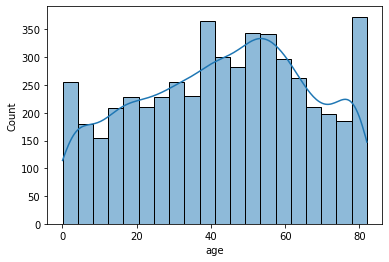

In [25]:
sns.histplot(data=Stroke_pd, x="age", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

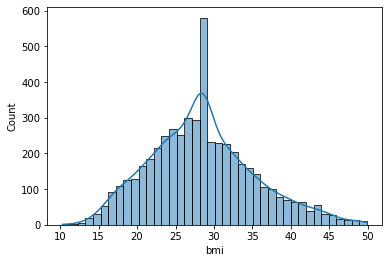

In [26]:
sns.histplot(data=Stroke_pd, x="bmi", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

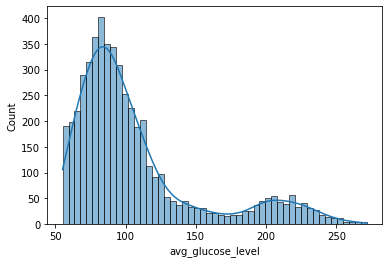

In [27]:
sns.histplot(data=Stroke_pd, x="avg_glucose_level", kde=True)

## Histogram for numerical variables age, bmi, and avg_glucose_level with incidence of stroke

<AxesSubplot:xlabel='age', ylabel='Count'>

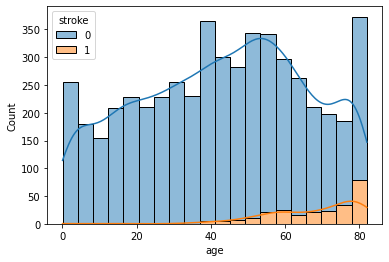

In [28]:
sns.histplot(data=Stroke_pd, x="age", hue="stroke", multiple="stack", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

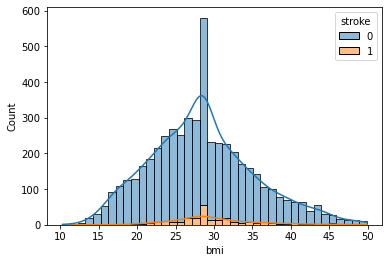

In [29]:
sns.histplot(data=Stroke_pd, x="bmi", hue="stroke", multiple="stack", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

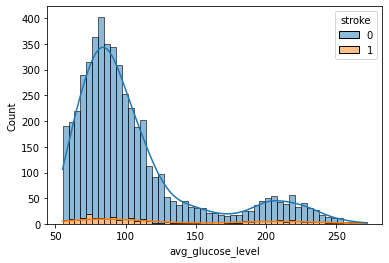

In [30]:
sns.histplot(data=Stroke_pd, x="avg_glucose_level", hue="stroke", multiple="stack", kde=True)

### When examining our three numeric variables we notice "age" is normally distributed and has a much higher incidence of stroke as age increases. Ages below 40 had very few stroke incidences. As for "bmi", stroke incidences increased as bmi increased. However, for "avg_glucose_level" it seemed to have two areas with increased stroke incidences. The first is within a normal glucose level and then interestingly when glucose levels are above 160. There may be some correlation of bmi and glucose levels with strokes.

**Categorical** **variable** **analysis** **with** **incidence** **of** **stroke**

### Gender and Stroke
#### Female = 0     Male = 1

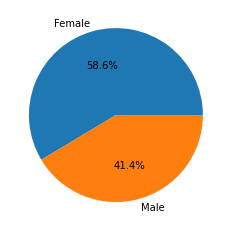

In [31]:
labels = ["Female", "Male"]
values = Stroke_pd['gender'].value_counts().tolist()[:2]
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

In [32]:
Stroke_pd[Stroke_pd["gender"]==0]["stroke"].value_counts()

0    2853
1     141
Name: stroke, dtype: int64

In [33]:
Stroke_pd[Stroke_pd["gender"]==1]["stroke"].value_counts()

0    2008
1     108
Name: stroke, dtype: int64

A female has a probability of 4.71 % to get a stroke

A male has a probability of 5.1 % to get a stroke



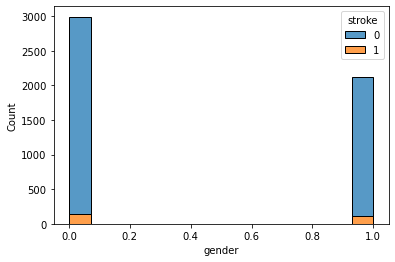

In [34]:
sns.histplot(data=Stroke_pd, x="gender", hue="stroke", multiple="stack")

print (f'A female has a probability of {round(Stroke_pd[Stroke_pd["gender"]==0]["stroke"].mean()*100,2)} % to get a stroke')

print()

print (f'A male has a probability of {round(Stroke_pd[Stroke_pd["gender"]==1]["stroke"].mean()*100,2)} % to get a stroke')

print()

#### Even though there are more stroke cases for females, the ratio of strokes per gender was slightly higher for males than females. 

### Hypertension and Stroke
#### no hypertension = 0     hypertension = 1

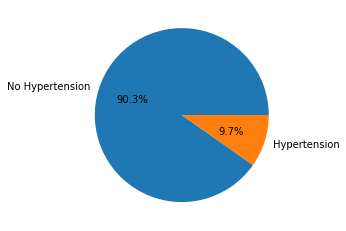

In [35]:
labels = ["No Hypertension", "Hypertension"]
values = Stroke_pd['hypertension'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

A person with hypertension has a probability of 13.25 % get a stroke

A person without hypertension has a probability of  3.97 % get a stroke


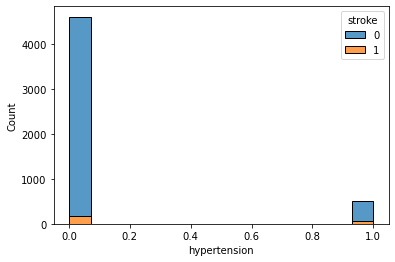

In [36]:
sns.histplot(data=Stroke_pd, x="hypertension", hue="stroke", multiple="stack")

print (f'A person with hypertension has a probability of {round(Stroke_pd[Stroke_pd["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without hypertension has a probability of  {round(Stroke_pd[Stroke_pd["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')

### Heart Disease and Stroke
#### No Heart Disease = 0   Heart Disease = 1

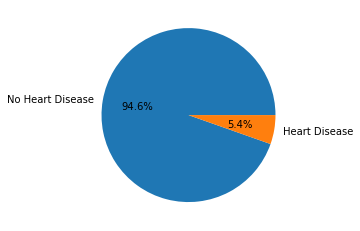

In [37]:
labels = ["No Heart Disease", "Heart Disease"]
values = Stroke_pd['heart_disease'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

A person with heart disease has a probability of 17.03 % get a stroke

A person without heart disease has a probability of 4.18 % get a stroke


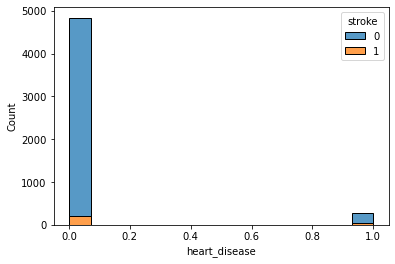

In [38]:
sns.histplot(data=Stroke_pd, x="heart_disease", hue="stroke", multiple="stack")

print (f'A person with heart disease has a probability of {round(Stroke_pd[Stroke_pd["heart_disease"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person without heart disease has a probability of {round(Stroke_pd[Stroke_pd["heart_disease"]==0]["stroke"].mean()*100,2)} % get a stroke')

### Marriage and Stroke
#### Not married = 0   ever married = 1 

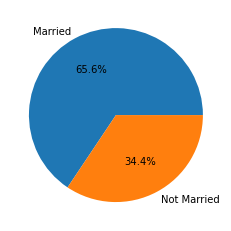

In [39]:
labels = ["Married", "Not Married"]
values = Stroke_pd['ever_married'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

A person married (or married before) has a probability of 6.56 % get a stroke

A person never married has a probability of 1.65 % get a stroke


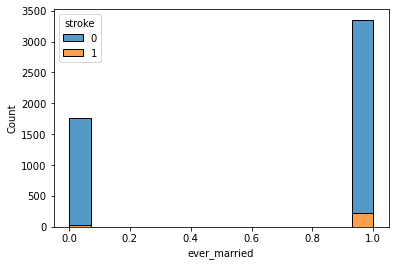

In [40]:
sns.histplot(data=Stroke_pd, x="ever_married", hue="stroke", multiple="stack")
print (f'A person married (or married before) has a probability of {round(Stroke_pd[Stroke_pd["ever_married"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never married has a probability of {round(Stroke_pd[Stroke_pd["ever_married"]==0]["stroke"].mean()*100,2)} % get a stroke')

### Work type and Stroke
#### Private = 0   Self-employed = 1   children = 2   Govt_job = 3   Never_worked = 4


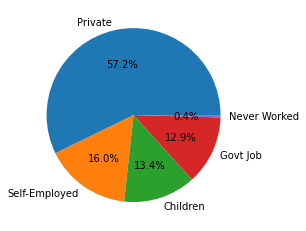

In [41]:
labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = Stroke_pd['work_type'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

A person with private work type has a probability of 5.09 % get a stroke

Self-employed person has a probability of 7.94 % get a stroke

A person with a government job has a probability of 5.02 % get a stroke

A child has a probability of 0.29 % get a stroke

A person never worked has a probability of 0.0 % get a stroke


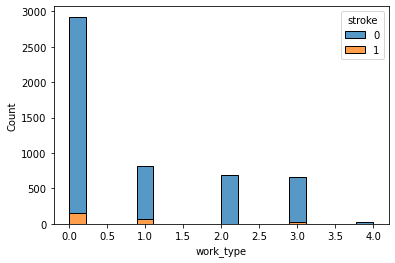

In [42]:
sns.histplot(data=Stroke_pd, x="work_type", hue="stroke", multiple="stack")

print (f'A person with private work type has a probability of {round(Stroke_pd[Stroke_pd["work_type"]==0]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'Self-employed person has a probability of {round(Stroke_pd[Stroke_pd["work_type"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person with a government job has a probability of {round(Stroke_pd[Stroke_pd["work_type"]==3]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A child has a probability of {round(Stroke_pd[Stroke_pd["work_type"]==2]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never worked has a probability of {round(Stroke_pd[Stroke_pd["work_type"]==4]["stroke"].mean()*100,2)} % get a stroke')

### Residence Type and Stroke
#### Rural = 0   Urban = 1


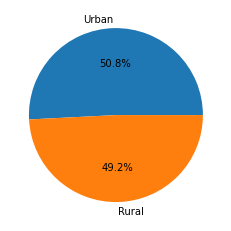

In [43]:
labels = ["Urban", "Rural"]
values = Stroke_pd['Residence_type'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

A person, who lives in urban area, has a probability of 5.2 %  get a stroke

A person, who lives in rural area, has a probability of 4.53 % get a stroke


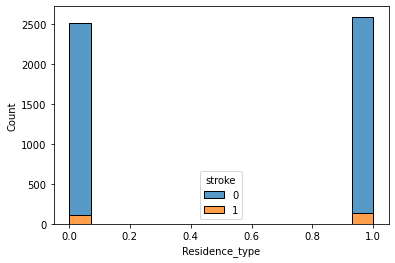

In [44]:
sns.histplot(data=Stroke_pd, x="Residence_type", hue="stroke", multiple="stack")

print (f'A person, who lives in urban area, has a probability of {round(Stroke_pd[Stroke_pd["Residence_type"]==1]["stroke"].mean()*100,2)} %  get a stroke')

print()

print (f'A person, who lives in rural area, has a probability of {round(Stroke_pd[Stroke_pd["Residence_type"]==0]["stroke"].mean()*100,2)} % get a stroke')

### Smoking Status and Stroke
#### Unknown = 0   never smoked = 1   formerly smoked = 2   smokes = 3

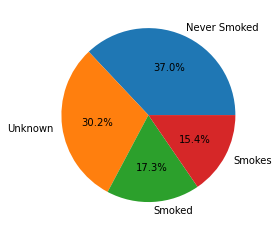

In [45]:
labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = Stroke_pd['smoking_status'].value_counts().tolist()
plt.pie(x=values, labels=labels, autopct="%.1f%%")
plt.show()

A formerly smoked person has a probability of 7.91 % get a stroke

A person never smoked has a probability of 4.76 % get a stroke

A person smokes has a probability of 5.32 % get a stroke

A person whom smoking history is not known,has a probability of 3.04 % get a stroke



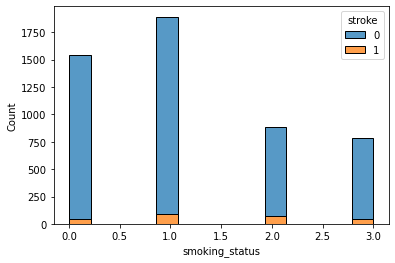

In [46]:
sns.histplot(data=Stroke_pd, x="smoking_status", hue="stroke", multiple="stack")

print (f'A formerly smoked person has a probability of {round(Stroke_pd[Stroke_pd["smoking_status"]==2]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person never smoked has a probability of {round(Stroke_pd[Stroke_pd["smoking_status"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person smokes has a probability of {round(Stroke_pd[Stroke_pd["smoking_status"]==3]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'A person whom smoking history is not known,has a probability of {round(Stroke_pd[Stroke_pd["smoking_status"]==0]["stroke"].mean()*100,2)} % get a stroke')

print()

In [47]:
Stroke_pd.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027924,0.021143,0.085617,-0.030483,0.033754,-0.006340,0.054902,-0.013543,-0.002526,0.009027
age,-0.027924,1.000000,0.276398,0.263796,0.679125,-0.182384,0.014180,0.238171,0.363060,0.307009,0.245257
hypertension,0.021143,0.276398,1.000000,0.108306,0.164243,-0.030550,-0.007913,0.174474,0.146854,0.106639,0.127904
heart_disease,0.085617,0.263796,0.108306,1.000000,0.114644,-0.030156,0.003092,0.161857,0.054273,0.085211,0.134914
ever_married,-0.030483,0.679125,0.164243,0.114644,1.000000,-0.171142,0.006261,0.155068,0.360413,0.284833,0.108340
work_type,0.033754,-0.182384,-0.030550,-0.030156,-0.171142,1.000000,0.019358,-0.033069,-0.190256,-0.161920,-0.032098
Residence_type,-0.006340,0.014180,-0.007913,0.003092,0.006261,0.019358,1.000000,-0.004946,0.007993,0.022853,0.015458
avg_glucose_level,0.054902,0.238171,0.174474,0.161857,0.155068,-0.033069,-0.004946,1.000000,0.171381,0.079825,0.131945
bmi,-0.013543,0.363060,0.146854,0.054273,0.360413,-0.190256,0.007993,0.171381,1.000000,0.243300,0.052588
smoking_status,-0.002526,0.307009,0.106639,0.085211,0.284833,-0.161920,0.022853,0.079825,0.243300,1.000000,0.054914


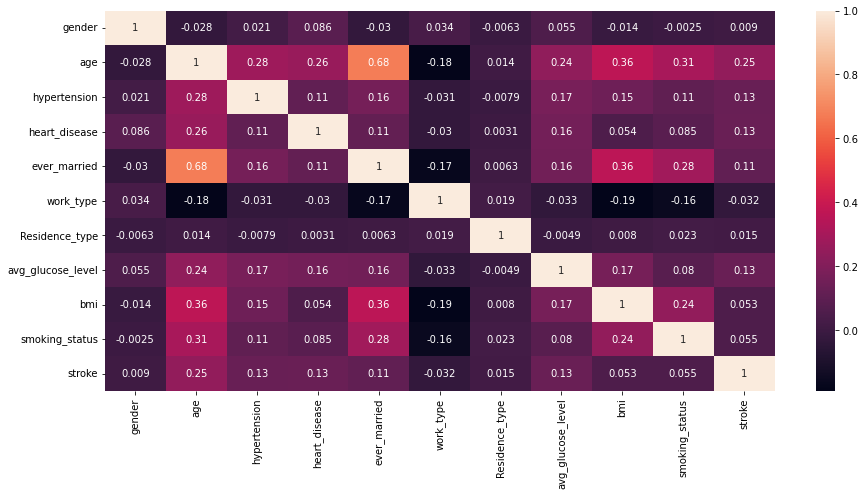

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(Stroke_pd.corr(),annot=True);

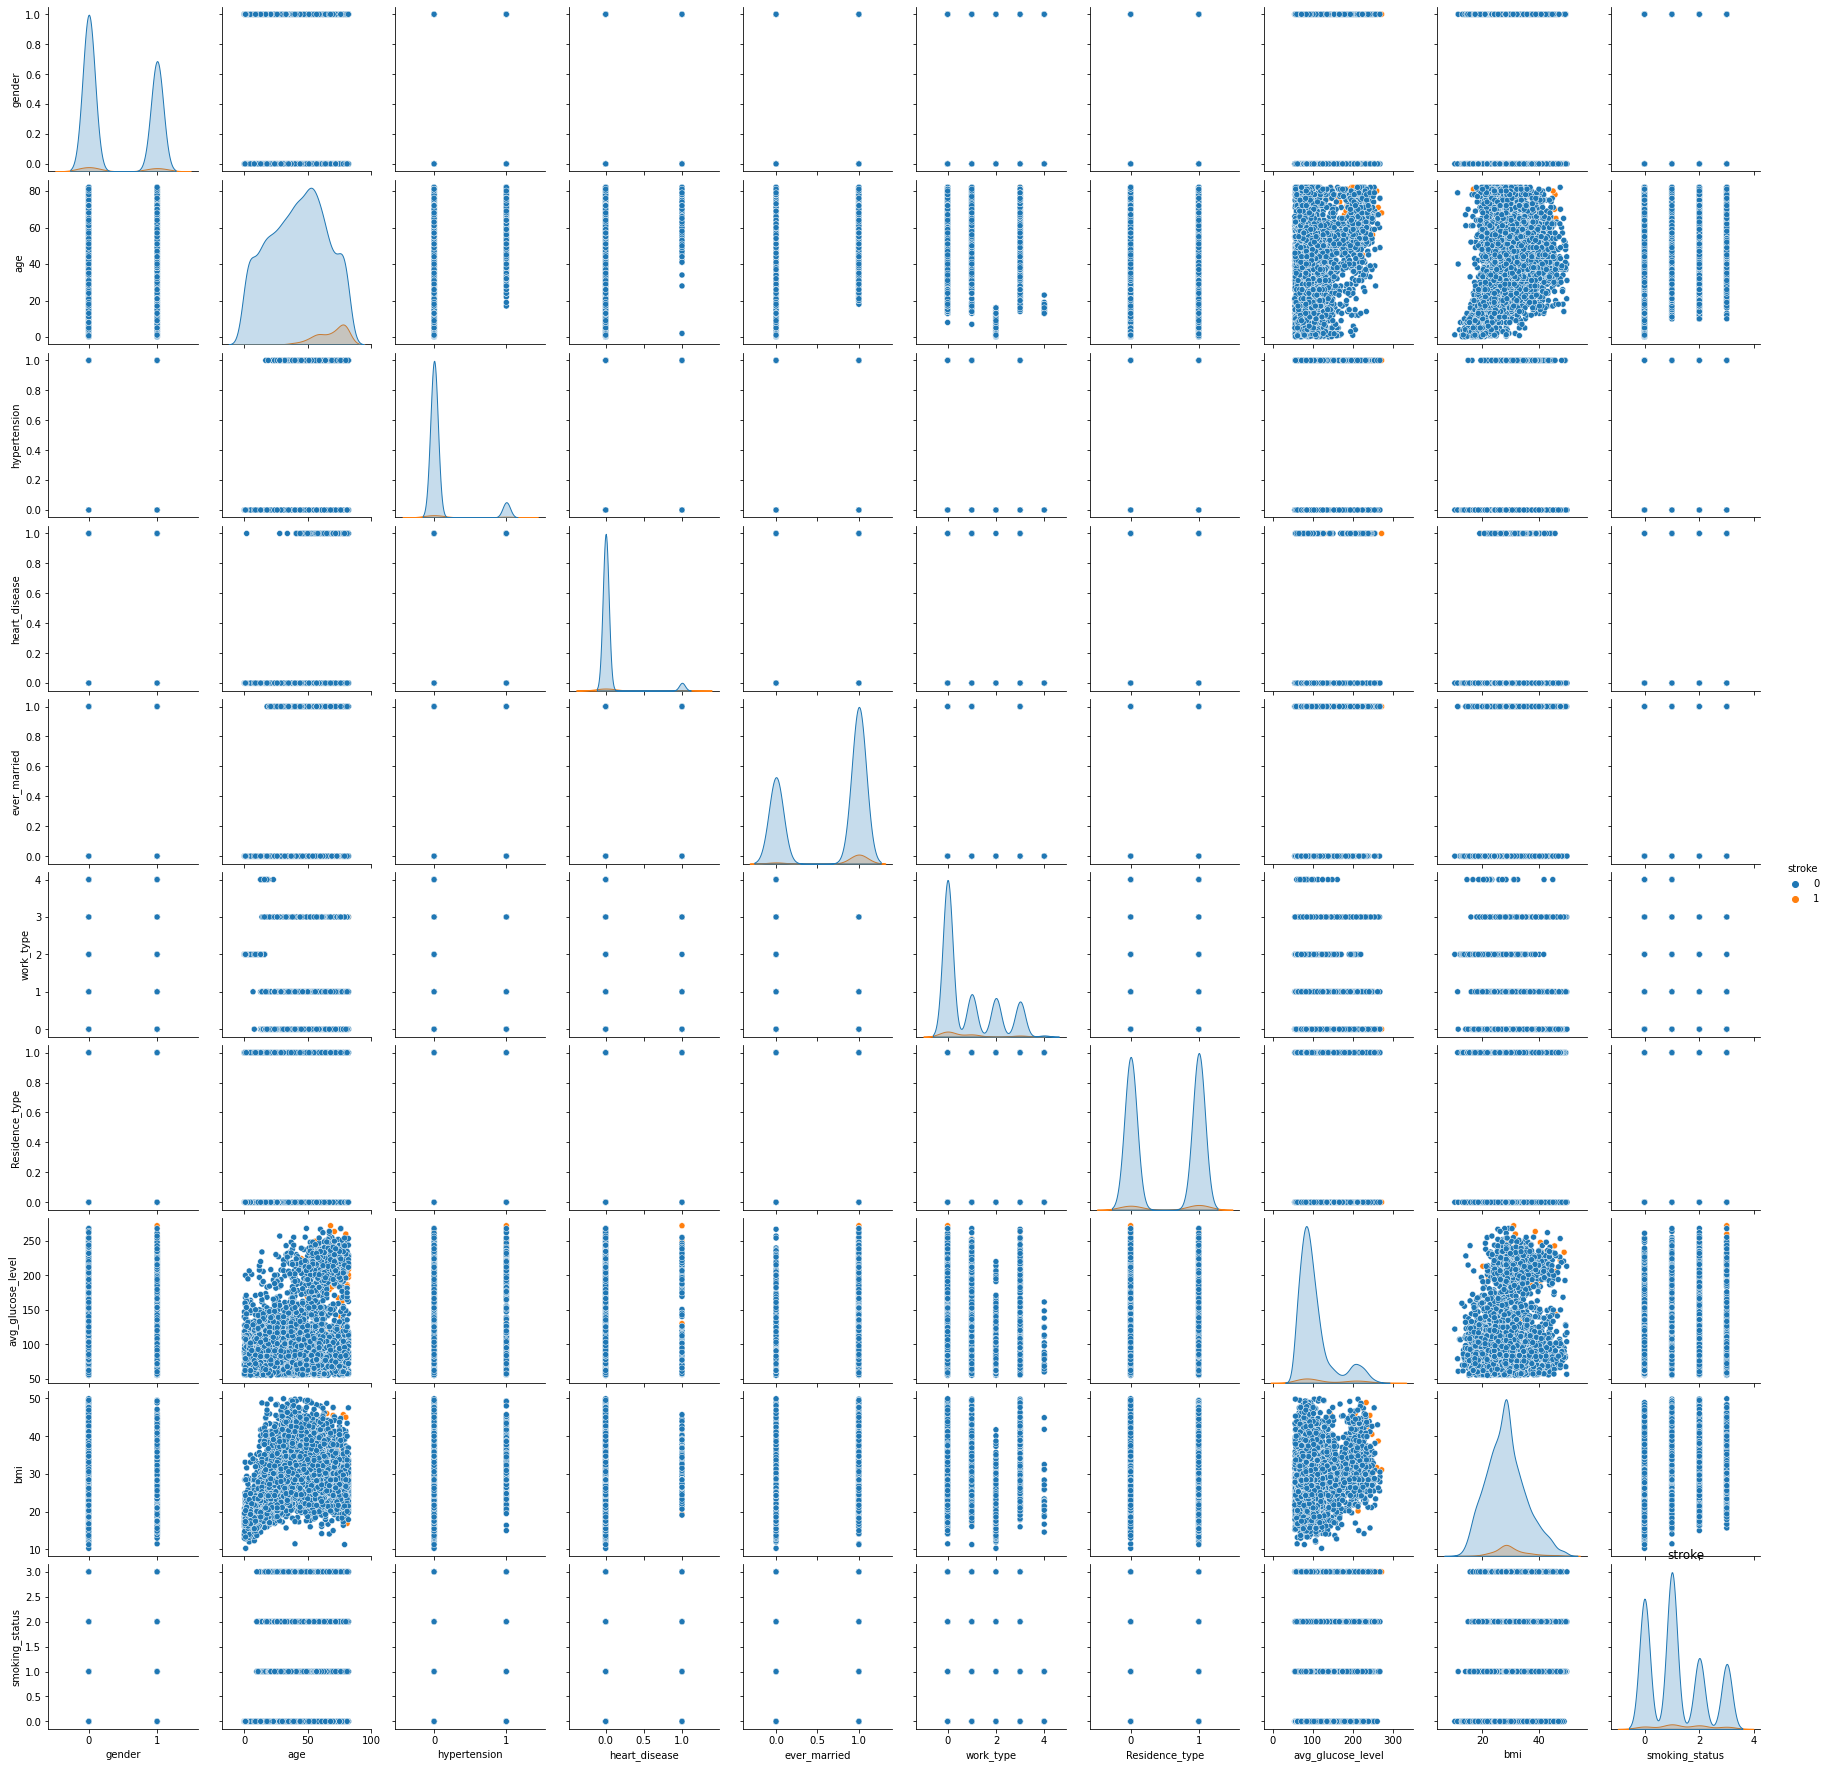

In [49]:
sns.pairplot(Stroke_pd, hue="stroke");
plt.title("stroke");

**Spliting** **the** **dataset** **into** **Training** **and** **Testing** 

In [50]:
X = Stroke_pd[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = Stroke_pd['stroke']

In [51]:
Stroke_pd.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Model** **Building** 

We want to try using an Unsupervised Learning Algorithm in order to 
For this part we will attempt to use KMeans Clustering to cluster the data into to two groups, Stroke YES and Stroke NO.
It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.
When using the Kmeans algorithm under normal circumstances, it is because we don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but we will not usually do this for Kmeans, so the classification report and confusion matrix at the end of this part, don't truly make sense in a real world setting.

In [54]:
# KMeans Clustering
pd.options.display.float_format='{:,.2f}'.format  #limit printing of decimals
from sklearn.cluster import KMeans
# Create an instance of K Means model with 2 clusters
kmeans = KMeans(n_clusters = 2, max_iter=600, verbose=1)
target = y_train
kmeans.fit(X_train)
#print(kmeans.cluster_centers_)

Initialization complete
Iteration 0, inertia 4752337.640431621
Iteration 1, inertia 2997003.25159499
Iteration 2, inertia 2988522.105071968
Iteration 3, inertia 2987219.0778310304
Iteration 4, inertia 2987037.101741337
Converged at iteration 4: center shift 0.02416731306771358 within tolerance 0.026301477052311804.
Initialization complete
Iteration 0, inertia 5180041.611994242
Iteration 1, inertia 3013482.3489861935
Iteration 2, inertia 2989539.750840302
Iteration 3, inertia 2987284.771957118
Iteration 4, inertia 2987058.9808319695
Iteration 5, inertia 2987024.1272241846
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4239724.487568175
Iteration 1, inertia 2988042.964978242
Iteration 2, inertia 2987049.912956395
Iteration 3, inertia 2987017.1799221765
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 10626414.731027497
Iteration 1, inertia 3068787.627994528
Iteration 2, inertia 2993911.9186897706
Iterat

KMeans(max_iter=600, n_clusters=2, verbose=1)

In [55]:
c = kmeans.predict(X_train)
print("c.shape",c.shape)  
print(X_train.shape) #same length
print(c)
print("y_train.shape",y_train.shape)
print(type(c))

c.shape (3066,)
(3066, 10)
[0 1 0 ... 0 1 0]
y_train.shape (3066,)
<class 'numpy.ndarray'>


In [56]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import completeness_score, homogeneity_score
pd.options.display.float_format='{:,.2f}'.format


print("KMeans Cluster Completeness Score: ",completeness_score(y_train,c))
print()
print("KMeans Cluster Homogeneity Score: ",homogeneity_score(y_train, c))


KMeans Cluster Completeness Score:  0.02197521543704805

KMeans Cluster Homogeneity Score:  0.05046808296698434


In [57]:
print("KMeans Clustering Results")
print(confusion_matrix(y_train,kmeans.labels_))
print(classification_report(y_train,kmeans.labels_))

KMeans Clustering Results
[[2513  412]
 [  83   58]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2925
           1       0.12      0.41      0.19       141

    accuracy                           0.84      3066
   macro avg       0.55      0.64      0.55      3066
weighted avg       0.93      0.84      0.88      3066



The completeness score approaches 1 when most of the data points that are members of a given class are elements of the same cluster while the homogeneity score approaches 1 when all the clusters contain almost only data points that are member of a single class.

Using Kmeans as a tool to classify our data according to clusters did not have the accuracy we were hoping for, however, it was interesting to try. It returned a classification accuracy of about 64%. 

**Decision** **Tree** **Model**

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
predictions = dtree.predict(X_test)

In [62]:
score = dtree.score(X_test, y_test)
print('Testing Score \n',score)

Testing Score 
 0.9197651663405088


 DECISION TREE Model Results
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1936
           1       0.18      0.15      0.16       108

    accuracy                           0.92      2044
   macro avg       0.57      0.56      0.56      2044
weighted avg       0.91      0.92      0.92      2044



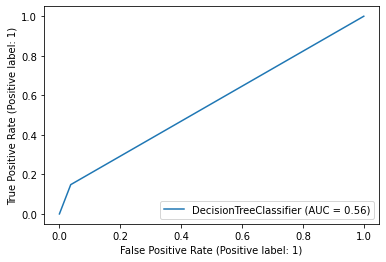

In [63]:
print(" DECISION TREE Model Results")
print(classification_report(y_test,predictions))  # 92 % accuracy is good
metrics.plot_roc_curve(dtree,X_test, y_test) 

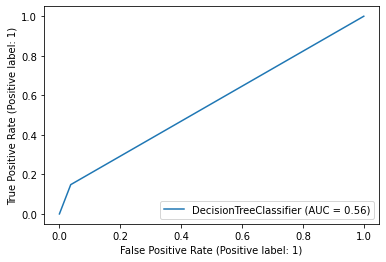

In [64]:
metrics.plot_roc_curve(dtree, X_test, y_test) 

In [65]:
print(confusion_matrix(y_test,predictions))

[[1864   72]
 [  92   16]]


**Logistic** **Regression** **model**

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression(max_iter=3000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [68]:
predictions = logmodel.predict(X_test)

In [69]:
score = logmodel.score(X_test, y_test)
print('Testing Score \n',score)

Testing Score 
 0.9476516634050881


Evaluation of our Logistic Regression Model results
We can check precision,recall,f1-score using classification report!

In [70]:
print("Logistic Regression Model Results")
print(classification_report(y_test,predictions))

Logistic Regression Model Results
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1936
           1       1.00      0.01      0.02       108

    accuracy                           0.95      2044
   macro avg       0.97      0.50      0.50      2044
weighted avg       0.95      0.95      0.92      2044



Logistic Regression Area Under the Curve 


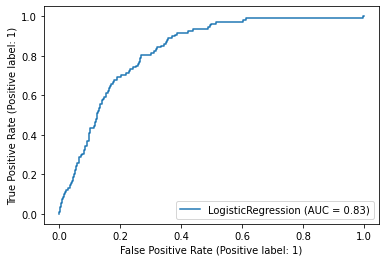

In [71]:
print("Logistic Regression Area Under the Curve ")
metrics.plot_roc_curve(logmodel, X_test, y_test) 

**K** **Nearest** **Neighbors**

We will try to use KNN to create a model that directly predicts a class for stroke.

Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X)

StandardScaler()

In [75]:
scaled_features = scaler.transform(X)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.30)

Using KNN: we are trying to make a model to predict whether someone will have a stroke.

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

In [79]:
X_train  # confirm it is scaled.

array([[-0.84068236,  0.78607007, -0.32860186, ..., -0.57990685,
        -0.57975706,  1.76738276],
       [-0.84068236, -0.71766046, -0.32860186, ..., -1.10906897,
        -1.19592746,  1.76738276],
       [ 1.18950991, -0.85034257, -0.32860186, ...,  0.37439596,
         1.38611995, -0.17462905],
       ...,
       [-0.84068236, -0.18693204, -0.32860186, ..., -0.41426762,
         0.0647626 , -0.17462905],
       [-0.84068236,  0.96297955, -0.32860186, ..., -0.38268574,
        -0.03694027,  0.79637686],
       [-0.84068236, -0.18693204, -0.32860186, ..., -0.35419579,
        -0.71179357, -0.17462905]])

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
pred = knn.predict(X_test)

Predictions and Evaluations
Let's evaluate our KNN model!

In [82]:
print(confusion_matrix(y_test,pred))

[[1392   64]
 [  73    4]]


K Nearest Neighbor Model results with 1 neighbor
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1456
           1       0.06      0.05      0.06        77

    accuracy                           0.91      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.91      0.91      1533

KNN area under the curve


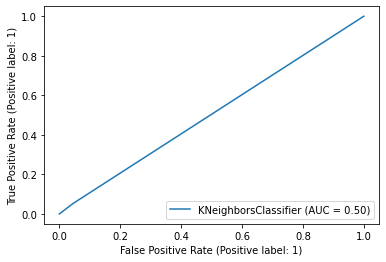

In [83]:

print("K Nearest Neighbor Model results with 1 neighbor")
print(classification_report(y_test, pred))
print("KNN area under the curve")
metrics.plot_roc_curve(knn, X_test, y_test) 

We can see how changing the number of neighbors changes the error rate with a plot. 

Choosing a K Value:
use the elbow method to pick a good K Value:

In [84]:
error_rate = []

# Will take some time

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

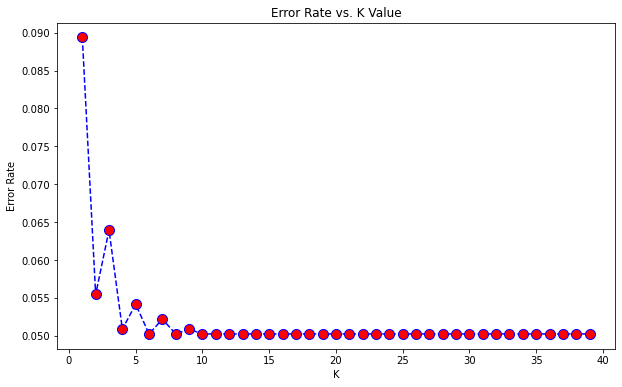

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>6 the error rate just tends to hover around 0.05. Let's retrain the model with that and check the classification report.

FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

In [86]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1392   64]
 [  73    4]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1456
           1       0.06      0.05      0.06        77

    accuracy                           0.91      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.91      0.91      1533



KNN results with 6 neighbors

WITH K=6


[[1456    0]
 [  77    0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1456
           1       0.00      0.00      0.00        77

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

KNN under the curve


/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cdmstudent/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


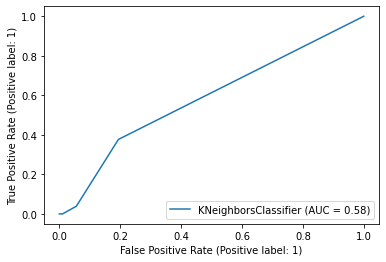

In [87]:
# NOW WITH K=6
print("KNN results with 6 neighbors")
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print()
print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print("KNN under the curve")
metrics.plot_roc_curve(knn, X_test, y_test) 

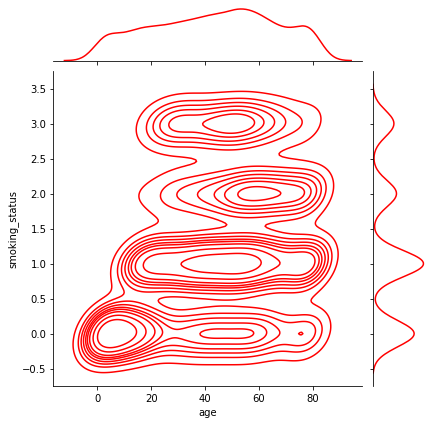

In [88]:
sns.jointplot(x='age',y='smoking_status',data=Stroke_pd,color='red',kind='kde');